In [6]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

matplotlib.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from homer_preprocessing import read_homer_gene_exp, import_homer_diffgene, pull_comparisons_get_diff
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano, plot_exp_rpkm, gene_list_bar_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
workingDirectory = '/home/h1bennet/strains_rna/results/K04_Kupffer_obob_leptin_RNA/'
dataDirectory = '/home/h1bennet/strains/data/RNA/leptin_6h/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# make folder for figures
if not os.path.isdir('./figures/'):
    os.mkdir('./figures')
    
# make folder for gene lists
if not os.path.isdir('./gene_lists/'):
    os.mkdir('./gene_lists')
    
if not os.path.isdir('./promoter_motif_finding'):
    os.mkdir('./promoter_motif_finding')

Look at results from running O'young's pipeline...

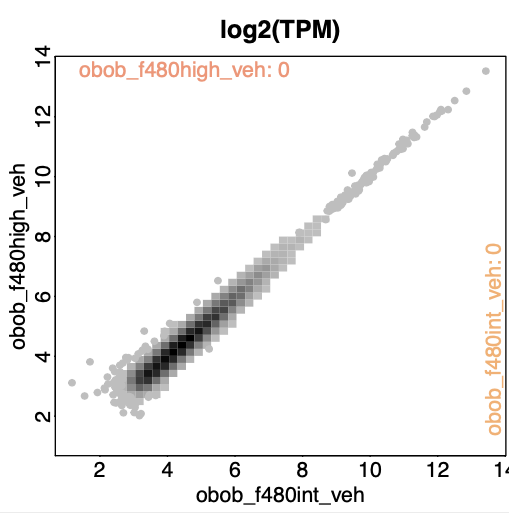

Looking at the differential

In [12]:
!ls

AJ Balb C57 Healthy NASH CCL4.csv
AJ Balb C57 Healthy NASH CCL4 obob leptin.csv
differential
expression
figures
gene_lists
homer_known_motifs_distal_log.txt
leptin_6h_qc
obob_leptin_induced_fc1_padj05.txt
obob_leptin_repressed_fc1_padj05.txt
promoter_motif_finding
qcStats.txt
sampleDef.txt


In [13]:
df, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
    depath='./differential/obob_f480int_veh.vs.obob_f480high_veh.scatter.homer.txt',
    gepath='./expression/HOMER.rawTPM.txt',
    gene_name_index=True)

ge all transcripts (24940, 20)
Diff Gene selected transcripts (8125, 14)
ge selected transcripts (8125, 20)


In [16]:
df.sort_values('padj', ascending=True).head()

,RepeatID,chr,start,end,strand,Length,Copies,Annotation/Divergence,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast
gene,,,,,,,,,,,,,,,
Gpnmb,NM_053110,chr6,49036518,49058182,+,3785.0,1,Gpnmb|DC-HIL|Dchil|ipd|-|6 B2.3|6 23.82 cM|pro...,649.671227,0.655689,0.110200,5.949994,2.681521e-09,0.000022,obob_f480high_veh-obob_f480int_veh
Klf2,NM_008452,chr8,72319062,72321654,+,1811.0,1,Klf2|Lklf|-|8|8 B3.3|protein-coding,977.085047,-0.452492,0.097470,-4.642372,3.444316e-06,0.013993,obob_f480high_veh-obob_f480int_veh
Mmp12,NM_001320076,chr9,7347374,7360461,+,3653.0,1,Mmp12|AV378681|MME|Mmel|-|9 A1|9 2.46 cM|prote...,2326.359669,0.465644,0.111438,4.178515,2.934187e-05,0.079468,obob_f480high_veh-obob_f480int_veh
Gdf15,NM_001330687,chr8,70629393,70632456,-,1376.0,1,Gdf15|MIC-1|NAG-1|SBF|-|8|8 B3.3|protein-coding,125.305888,0.432184,0.107423,4.023193,5.741442e-05,0.116623,obob_f480high_veh-obob_f480int_veh
Cxcl2,NM_009140,chr5,90903899,90905938,+,1077.0,1,Cxcl2|CINC-2a|GROb|Gro2|MIP-2|MIP-2a|Mgsa-b|Mi...,419.225765,0.436636,0.111045,3.932059,8.422122e-05,0.123240,obob_f480high_veh-obob_f480int_veh


Based on this only two genes pass the p value threshold.

# Single gene plots

In [17]:
tpm_mat = pd.read_csv('./expression/rawT.txt', sep='\t', index_col=0)

In [28]:
groups = [[0,1],
          [2,3],
          [4,5,6],
          # [7,8],
          [9,10,11]
          # [12]
         ]

group_labels = ['c57bl6j_kupffer',
                'het_f480high_veh',
                'obob_f480high_veh',
                # 'obob_f480high_leptin',
                'obob_f480int_veh'
                # 'obob_f480int_leptin'
               ]

colors = ['#bdbdbd',
          '#636363',
          '#fc9272',
          # '#de2d26',
          '#fdae6b'
          # '#e6550d'
         ]

# make legend
legend_elements = []
for lab, col in  zip(group_labels, colors):
    legend_elements.append(Patch(label=lab, color=col))

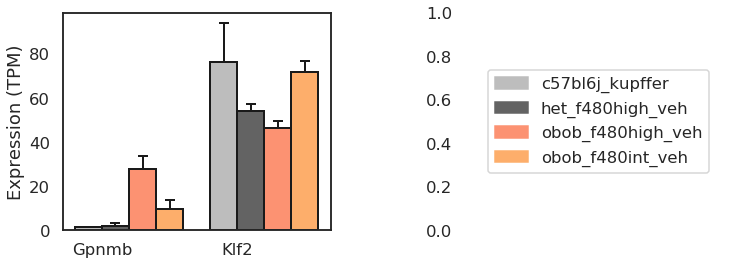

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.5)

gene_list_bar_plot(['Gpnmb', 'Klf2'],
                   tpm_mat,
                   groups=groups,
                   group_labels = group_labels,
                   colors = colors,
                   width=0.2,
                   ax=axs[0])

axs[0].get_legend().remove()

axs[1].legend(handles=legend_elements, loc='center');
axs[1].spines['top'].set_visible(False);
axs[1].spines['right'].set_visible(False);
axs[1].spines['left'].set_visible(False);
axs[1].spines['bottom'].set_visible(False);
axs[1].set_xticklabels('');

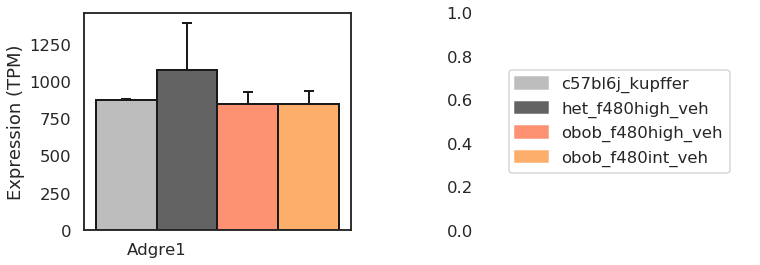

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.5)

gene_list_bar_plot(['Adgre1'],
                   tpm_mat,
                   groups=groups,
                   group_labels = group_labels,
                   colors = colors,
                   width=0.1,
                   ax=axs[0])

axs[0].get_legend().remove()

axs[1].legend(handles=legend_elements, loc='center');
axs[1].spines['top'].set_visible(False);
axs[1].spines['right'].set_visible(False);
axs[1].spines['left'].set_visible(False);
axs[1].spines['bottom'].set_visible(False);
axs[1].set_xticklabels('');

In [35]:
groups = [[0,1],
          [2,3],
          [4,5,6],
          [7,8],
          [9,10,11],
          [12]]

group_labels = ['c57bl6j_kupffer',
                'het_f480high_veh',
                'obob_f480high_veh',
                'obob_f480high_leptin',
                'obob_f480int_veh',
                'obob_f480int_leptin']

colors = ['#bdbdbd',
          '#636363',
          '#fc9272',
          '#de2d26',
          '#fdae6b',
          '#e6550d']

# make legend
legend_elements = []
for lab, col in  zip(group_labels, colors):
    legend_elements.append(Patch(label=lab, color=col))

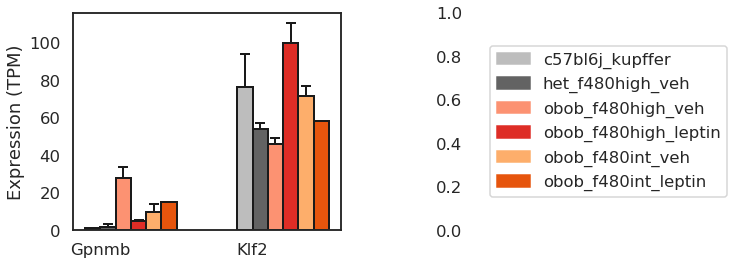

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.5)

gene_list_bar_plot(['Gpnmb', 'Klf2'],
                   tpm_mat,
                   groups=groups,
                   group_labels = group_labels,
                   colors = colors,
                   width=0.1,
                   ax=axs[0])

axs[0].get_legend().remove()

axs[1].legend(handles=legend_elements, loc='center');
axs[1].spines['top'].set_visible(False);
axs[1].spines['right'].set_visible(False);
axs[1].spines['left'].set_visible(False);
axs[1].spines['bottom'].set_visible(False);
axs[1].set_xticklabels('');

Takeaway from this is that we can probably bulk sort a larger F480 gate for ChIP-seq, ATAC-seq, and RNA-seq. The only thing is the MIGHT respond differently to leptin? but the population usually just goes away... so we should just ignore the differences.